## Expedition Clustering Full Dataset Labeling

In order to verify our clustering is working effectively, let's identify and label a set of expeditions.

Let's say 10 (and more if we deem necessary!)

And while we're at it, we can get an idea of the spatiotemporal separations (epsilon, or ϵ) and Levenshtein distances we can expect in expeditions to use in clustering later.

In [396]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [397]:
import numpy as np
import pandas as pd

from plotting import plot_time_histogram, plot_geographical_positions

In [398]:
df = pd.read_csv("../data/full_df.csv", on_bad_lines = "skip", index_col=None)
df.columns = map(str.lower, df.columns)

In [399]:
# Drop 
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df['cluster'] = np.nan

In [400]:
df = df.sort_values(by='startdate')

In [401]:
df

,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,enddate,remarks,localityid,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,cluster
36796,316747,NaN,1.0,19576.0,249495.0,249598.0,f6f0a625-3e08-4b14-89e6-246fe7dbe2f9.jpg,1824-08-19,1824-08-19,NaN,19576.0,NaN,NaN,NaN,34.325200,-117.428100,Cajon Pass,NaN,22905.0,NaN
27850,239749,Low spreading shrub,1.0,24396.0,415121.0,415225.0,2dc951de-d18f-4a64-8492-8db9bff37376.jpg,1850-01-01,NaN,NaN,24396.0,NaN,NaN,NaN,32.000000,-114.000000,Monterey,NaN,17286.0,NaN
36546,314625,NaN,1.0,46316.0,562709.0,562813.0,b5574eee-8e19-4d64-8919-6ac7b7f8e125.jpg,1852-07-01,1852-07-01,NaN,46316.0,NaN,NaN,NaN,37.751400,-122.441300,San Francisco,NaN,22943.0,NaN
6376,54581,NaN,1.0,105965.0,373473.0,373576.0,2d4222d2-d6ea-4ae0-9416-c2de90aa10dd.jpg,1862-04-01,1862-04-01,NaN,105965.0,NaN,NaN,NaN,37.923753,-122.597551,Near Tamalpais. Hills of Marin County.,NaN,16464.0,NaN
1767,14699,NaN,1.0,136720.0,191804.0,191805.0,8065b346-86a6-4127-828d-c0e07af03d87.jpg,1862-09-08,1862-09-08,NaN,136720.0,NaN,NaN,NaN,40.962500,-122.440400,In the valley of the Upper Sacramento near 'Ji...,NaN,24800.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,134324,"Cespitose, common.",1.0,104627.0,335198.0,335301.0,301d50ef-83bf-4b0a-8d35-c0d719eedf57.jpg,2010-08-10,2010-08-10,"On dry, gentle slope, forest edges and meadows...",104627.0,2365.0,2365.0,0.0,38.796667,-119.968333,"NW end of Grass Lake, W side of Luther Pass.",NaN,10339.0,NaN
9863,84415,"Cespitose, only 1 male plant seen, clumps common.",1.0,13111.0,328682.0,328785.0,e9e4e415-1bde-4318-b6d6-9cf4775a6b30.jpg,2010-08-10,2010-08-10,"Not much raised above surrounding peat, full s...",13111.0,2365.0,2365.0,0.0,38.796667,-119.968333,"NW end of Grass Lake, W side of Luther Pass.",NaN,10339.0,NaN
24001,206529,"Cespitose, common.",1.0,127449.0,338772.0,338875.0,e29a672d-8489-49ed-aad0-757b71b61286.jpg,2010-08-12,2010-08-12,"Dry, gentle slope, over volcanic pumice and du...",127449.0,2730.0,2730.0,0.0,37.650000,-119.040000,Along Route 203 above Mammoth Mountain ski lifts,NaN,17214.0,NaN
44760,688115,Epiphytic.,NaN,529612.0,211281.0,211384.0,37550c42-03cf-4e5b-8636-f68cb60e8720.jpg,2014-05-23,NaN,On trees. Montane Forest.,99709.0,1980.0,NaN,NaN,6.995833,125.253267,"Mt. Apo, EDC trail, Ilomavis, Kidapawan, North...",NaN,33645.0,NaN


In [402]:

df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

df['startdate_num'] = df['startdate'].view(int)//1e9
df['enddate_num'] = df['enddate'].view(int)//1e9

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_14017/342917146.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['startdate_num'] = df['startdate'].view(int)//1e9
/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_14017/342917146.py:5: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['enddate_num'] = df['enddate'].view(int)//1e9


In [403]:
df[['latitude1', 'longitude1', 'localityname', 'startdate_num', 'enddate_num']].head(5)

,latitude1,longitude1,localityname,startdate_num,enddate_num
36796,34.325200,-117.428100,Cajon Pass,-4.587408e+09,-4.587408e+09
27850,32.000000,-114.000000,Monterey,-3.786826e+09,-9.223372e+09
36546,37.751400,-122.441300,San Francisco,-3.708029e+09,-3.708029e+09
6376,37.923753,-122.597551,Near Tamalpais. Hills of Marin County.,-3.400358e+09,-3.400358e+09
1767,40.962500,-122.440400,In the valley of the Upper Sacramento near 'Ji...,-3.386534e+09,-3.386534e+09


In [404]:
def get_dist_from_latlon(ll1, ll2):
    return geopy.distance.geodesic(ll1, ll2).km


Lets do some manual expedition cluster labeling!

First, let's look at the distance between records that seem to be in a single cluster... Let's find the max of a couple that seem like they belong _together_

Let's start small, then increase radius

# 1. Cluster Labeling

∆lat = 0.00001

In [405]:
samp_collobjid_l = list(df.collectionobjectid.sample(10, random_state=123))
samp_collobjid_l

[178364, 65724, 365383, 164829, 296037, 320180, 244207, 245295, 33872, 46139]

[325334, 203161, 275379, 189769, 306553, 305052, 53269, 124799, 104780, 177087]

## a.) Collection Object ID: 325334

In [425]:
samp_record = df[df.collectionobjectid == 325334]
samp_record

,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,enddate,remarks,...,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,cluster,startdate_num,enddate_num
37784,325334,NaN,1.0,152848.0,470470.0,470574.0,c5d21bad-9129-4b37-9df6-e8a9dc84cc05.jpg,1934-06-11,1934-06-11,NaN,...,5200.0,0.0,41.4506,-120.3595,Parker Creek.,NaN,17158.0,NaN,-1.122163e+09,-1.122163e+09


In [426]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lat

np.float64(41.4506)

In [427]:
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.000001].sort_values(by='startdate')
test_df

,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,enddate,remarks,...,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,cluster,startdate_num,enddate_num
14155,121374,NaN,1.0,38744.0,596838.0,596942.0,a9b2f61a-7478-4294-9fcc-336091d6d70d.jpg,1919-06-03,1919-06-03,Marsh.,...,NaN,NaN,41.4506,-120.359500,Parker Creek near Modoc National Forest boundary.,NaN,17158.0,0,-1.596240e+09,-1.596240e+09
15163,130423,3 ft. high.,1.0,76813.0,361976.0,362079.0,9e7b2111-be8e-4b2d-967b-206cb21c9681.jpg,1919-06-03,NaT,NaN,...,NaN,NaN,41.4506,-120.359497,Parker Creek at Modoc Nat. Forest Boundary.,NaN,17158.0,0,-1.596240e+09,-9.223372e+09
13068,111904,NaN,1.0,27685.0,569421.0,569525.0,ed1fe32b-3bac-471b-badc-cb3b981861c8.jpg,1919-06-03,1919-06-03,NaN,...,NaN,NaN,41.4506,-120.359500,Along Parker Creek at Modoc National Forest bo...,NaN,17158.0,0,-1.596240e+09,-1.596240e+09
23801,204625,NaN,1.0,75672.0,320569.0,320672.0,3e22ae6c-f227-4fbd-93e4-48dd241447d2.jpg,1919-06-13,1919-06-13,NaN,...,NaN,NaN,41.4506,-120.359500,Parker Creek near Modoc National Forest boundary.,NaN,17158.0,0,-1.595376e+09,-1.595376e+09
26974,231915,5-petaled.,1.0,136303.0,361084.0,361187.0,8ce700c8-c89d-457c-8d0b-d80ce9ae3ef5.jpg,1919-06-13,NaT,NaN,...,NaN,NaN,41.4506,-120.359497,Parker Creek near Modoc Nat. Forest Boundary.,NaN,17158.0,0,-1.595376e+09,-9.223372e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42661,366945,NaN,1.0,32515.0,294451.0,294554.0,cbe52ee5-3412-4a51-b351-a3fecd38973b.jpg,1988-05-24,1988-05-24,In clay soil.,...,5100.0,0.0,41.4506,-120.359500,"Granger Canyon, Warner Mts..",NaN,17158.0,NaN,5.804352e+08,5.804352e+08
17054,146268,NaN,1.0,117987.0,487558.0,487662.0,509015c4-15d6-42e5-a57f-531712d663fd.jpg,1988-05-24,1988-05-24,In decomposed soft soil.,...,4900.0,0.0,41.4506,-120.359500,"Granger Canyon, Warner Mts..",NaN,17158.0,NaN,5.804352e+08,5.804352e+08
42746,367762,NaN,1.0,74691.0,152323.0,152324.0,241d3587-c107-44e5-aaf0-38f1b916f01f.jpg,1988-06-11,1988-06-11,Rocky soil.,...,5000.0,0.0,41.4506,-120.359500,Parker Creek Road.,NaN,17158.0,NaN,5.819904e+08,5.819904e+08
34934,300669,NaN,1.0,59378.0,294461.0,294564.0,67449f88-d384-4a25-b4e5-666aec1391e5.jpg,1989-06-14,1989-06-14,Growing in sandy soil.,...,4500.0,0.0,41.4506,-120.455900,Junction of Hwy 299 and Hwy 395 at turn off to...,NaN,17158.0,NaN,6.137856e+08,6.137856e+08


In [428]:
test_df.startdate.value_counts()

startdate
1934-06-11    60
1919-06-14    33
1919-06-13    20
1919-06-15    13
1932-06-10    11
1988-05-13     8
1934-06-16     8
1931-06-17     6
1940-06-01     5
1919-06-03     3
1931-06-11     3
1988-05-24     3
1932-06-22     3
1931-06-10     2
1932-08-01     2
1931-06-12     2
1932-07-22     2
1919-06-16     2
1931-06-20     2
1932-04-22     2
1932-05-27     2
1935-07-19     2
1932-07-11     2
1932-06-24     2
1932-06-26     2
1932-06-27     2
1931-06-01     1
1935-08-23     1
1935-07-05     1
1919-06-20     1
1935-08-25     1
1929-06-12     1
1981-05-22     1
1919-06-17     1
1988-06-11     1
1989-06-14     1
1935-06-11     1
1932-07-14     1
1934-06-14     1
1929-06-23     1
1932-07-18     1
1931-06-08     1
1932-07-08     1
1932-07-03     1
1929-06-28     1
1929-06-29     1
1931-09-18     1
1931-06-18     1
1929-07-01     1
1929-07-20     1
1989-07-14     1
Name: count, dtype: int64

In [429]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1919-06-03 00:00:00', '1919-06-13 00:00:00', '1919-06-14 00:00:00',
 '1919-06-15 00:00:00', '1919-06-16 00:00:00', '1919-06-17 00:00:00',
 '1919-06-20 00:00:00', '1929-06-12 00:00:00', '1929-06-23 00:00:00',
 '1929-06-28 00:00:00', '1929-06-29 00:00:00', '1929-07-01 00:00:00',
 '1929-07-20 00:00:00', '1931-06-01 00:00:00', '1931-06-08 00:00:00',
 '1931-06-10 00:00:00', '1931-06-11 00:00:00', '1931-06-12 00:00:00',
 '1931-06-17 00:00:00', '1931-06-18 00:00:00', '1931-06-20 00:00:00',
 '1931-09-18 00:00:00', '1932-04-22 00:00:00', '1932-05-27 00:00:00',
 '1932-06-10 00:00:00', '1932-06-22 00:00:00', '1932-06-24 00:00:00',
 '1932-06-26 00:00:00', '1932-06-27 00:00:00', '1932-07-03 00:00:00',
 '1932-07-08 00:00:00', '1932-07-11 00:00:00', '1932-07-14 00:00:00',
 '1932-07-18 00:00:00', '1932-07-22 00:00:00', '1932-08-01 00:00:00',
 '1934-06-11 00:00:00', '1934-06-14 00:00:00', '1934-06-16 00:00:00',
 '1935-06-11 00:00:00', '1935-07-05 00:00:00', '1935-07-19 00:00:00',
 '19

It looks like there are multiple events within this df. 

1. 1919-06-03 - 1919-06-20 (max day separation: 10 days)
2. 1929-06-12 - 1929-07-20 (max day separation: 20 days)
3. 1931-06-01 - 1931-06-20 (max day separation: 7 days)
4. 1931-09-18 
5. 1932-04-22 - 1932-08-01 (max day separation: 35 days) do we feel like this is too far separated to consist of a single expedition?
6. 1934-06-11 - 1934-06-16 (max day separation: 3 days)
7. 1935-06-11 - 1935-08-25 (max day separation: 34 days)
8. 1981-05-22 
9. 1988-05-13 - 1988-06-11 (max day separation: 20 days)
10. 1989-06-14 - 1989-07-14 (max day separation: 30 days)

In [430]:
cluster_date_l = [
    ('1919-06-03', '1919-06-20'),
    ('1929-06-12', '1929-07-20'),
    ('1931-06-01', '1931-06-20'),
    ('1931-09-18', '1931-09-18'), 
    ('1932-04-22', '1932-08-01'),
    ('1934-06-11', '1934-06-16'),
    ('1935-06-11', '1935-08-25'),
    ('1981-05-22', '1981-05-22'), 
    ('1988-05-13', '1988-06-11'),
    ('1989-06-14', '1989-07-14')
]

In [ ]:
### 

In [412]:
group1_df = test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group1_df

,latitude1,longitude1,text1,remarks,localityname,startdate,enddate
14155,41.4506,-120.359500,NaN,Marsh.,Parker Creek near Modoc National Forest boundary.,1919-06-03,1919-06-03
15163,41.4506,-120.359497,3 ft. high.,NaN,Parker Creek at Modoc Nat. Forest Boundary.,1919-06-03,NaT
13068,41.4506,-120.359500,NaN,NaN,Along Parker Creek at Modoc National Forest bo...,1919-06-03,1919-06-03
23801,41.4506,-120.359500,NaN,NaN,Parker Creek near Modoc National Forest boundary.,1919-06-13,1919-06-13
26974,41.4506,-120.359497,5-petaled.,NaN,Parker Creek near Modoc Nat. Forest Boundary.,1919-06-13,NaT
...,...,...,...,...,...,...,...
726,41.4506,-120.359500,Flowers pinkish.,rocky slopes.,Above Parker Creek near Modoc Nat. Forest Boun...,1919-06-15,1919-06-15
3459,41.4506,-120.359500,NaN,"^Artemisia^, ^Juniperus^ covered hills.","Above Parker Creek, Modoc Nat. Forest Boundry.",1919-06-16,1919-06-16
32976,41.4506,-120.359500,NaN,NaN,"Rock hill slope above Parker Creek, Modoc Nati...",1919-06-16,1919-06-16
23648,41.4506,-120.359500,NaN,Marsh.,Parker Creek near Modoc Nat. Forest Boundary.,1919-06-17,1919-06-17


In [413]:
group1_df.text1.isna().sum()/len(group1_df)

np.float64(0.7671232876712328)

In [414]:
group1_df.text1.unique()

array([nan, '3 ft. high.', '5-petaled.',
       'Roots with tubers, anthers lavender-purple.', 'Flowers white.',
       'Prostrate.', 'Flowers blue.', 'Flowers red, white center.',
       'Flowers cream.', 'Petals purplish at base.', 'Flowers yellow.',
       'Plant glandular, flowers red flecked with white.',
       'Flowers bluish white.', 'Crimson.', 'Petals cream color.',
       'Flowers pinkish.'], dtype=object)

It looks like pretty much all of these text1's are about flowers

In [415]:
group1_df.localityname.value_counts()

localityname
Parker Creek near Modoc Nat. Forest Boundary.                          9
Parker Creek at Modoc Nat. Forest Boundary.                            8
Above Parker Creek at Modoc Nat. Forest Boundary.                      4
Parker Creek near Modoc National Forest boundary.                      3
Parker Creek below Modoc Nat. Forest Boundary.                         3
Above Parker Creek, near Modoc Nat. Forest Boundary.                   2
Parker Creek near Modoc National Forest Boundary.                      2
Parker Creek at Modoc National Forest boundary.                        2
Above Parker Creek.                                                    1
Below Modoc Nat. Forest Boundary along Parker Creek.                   1
Along Parker Creek, Modoc Nat. Forest Boundary.                        1
Parker Creek, at Modoc Nat. Forest Boundary.                           1
Parker Creek near Modock National Forest boundary.                     1
Parker Creek, near Modoc Nat. Forest B

In [416]:
group1_df.localityname.unique()

array(['Parker Creek near Modoc National Forest boundary.',
       'Parker Creek at Modoc Nat. Forest Boundary.',
       'Along Parker Creek at Modoc National Forest boundary.,',
       'Parker Creek near Modoc Nat. Forest Boundary.',
       'Along Parker Creek at Modoc Nat Forest Boundary.',
       'Above Parker Creek.', 'Parker Creek near Nat. Forest Boundary.',
       'Above Parker Creek, near Modoc Nat. Forest Boundary.',
       'Above Parker Creek, Warner Mountains',
       'Modoc Nat. Forest Boundary.',
       'Above Parker Creek at Modoc Nat. Forest Boundary.',
       'Above Parker Creek near Modoc National Forest boundary.',
       'Parker Creek, near Modoc National Forest Boundary.',
       'Parker Creek near Modoc National Forest Boundary.',
       'Above Parker Creek at Modoc Nat. Forest boundary.',
       'Near Parker Creek, 15 mi. from Alturas.',
       'Above Parker Cr., 1 mi. above Modoc Nat. Forest Boundary.',
       'Parker Creek at Modoc National Forest boundary.',
  

In [417]:
group1_df['localityname'].str.contains('parker creek', case=False, na=False).sum()/len(group1_df)

np.float64(0.958904109589041)

95% of rows have "Parker Creek" in the localityname! This is a good sign. Let's look at those that don't have it

In [418]:
group1_df[~group1_df['localityname'].str.contains('parker creek', case=False, na=False)]

,latitude1,longitude1,text1,remarks,localityname,startdate,enddate
25502,41.4506,-120.3595,NaN,NaN,Modoc Nat. Forest Boundary.,1919-06-13,1919-06-13
35173,41.4506,-120.3402,NaN,Rocky exposed slope.,"Above Parker Cr., 1 mi. above Modoc Nat. Fores...",1919-06-14,1919-06-14
4685,41.4506,-120.3209,NaN,Yellow pine-fir forest.,1.5 mi. from Modoc National Forest boundary.,1919-06-14,1919-06-14


It looks like 1 has Parker Cr. and both of the others have Modoc (nat forest boundary), which aligns with other localitynames in the group df. 

I would say this entire df consists of a single cluster. 

Lets see if we can locate other records that belong to this cluster by searching for Parker Creek

In [419]:
all_parker_creek_df = df[df['localityname'].str.contains('parker creek', case=False, na=False)]

len(all_parker_creek_df)


270

In [420]:
# Looking at the group 1 cluster date range with a buffer of 60 days on each end, a generous amount of time to identify other potential cluster records

parker_creek_daterange_df = all_parker_creek_df[
    (pd.to_datetime(cluster_date_l[0][0]) - pd.Timedelta(days=60) <= all_parker_creek_df['startdate']) & \
    (all_parker_creek_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]) + pd.Timedelta(days=60))]\
        [['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]


In [421]:
parker_creek_daterange_df

,latitude1,longitude1,text1,remarks,localityname,startdate,enddate
14155,41.4506,-120.359500,NaN,Marsh.,Parker Creek near Modoc National Forest boundary.,1919-06-03,1919-06-03
15163,41.4506,-120.359497,3 ft. high.,NaN,Parker Creek at Modoc Nat. Forest Boundary.,1919-06-03,NaT
13068,41.4506,-120.359500,NaN,NaN,Along Parker Creek at Modoc National Forest bo...,1919-06-03,1919-06-03
35504,41.4506,-120.359500,NaN,NaN,Parker Creek near Modoc National Forest Boundary.,1919-06-13,1919-06-13
11256,41.4506,-120.359497,NaN,In water.,Parker Creek near Modoc Nat. Forest Boundary.,1919-06-13,NaT
...,...,...,...,...,...,...,...
28847,41.4506,-120.320900,NaN,NaN,"Above Parker Creek, 1.5 mi. above Modoc Nat. F...",1919-06-15,1919-06-15
3459,41.4506,-120.359500,NaN,"^Artemisia^, ^Juniperus^ covered hills.","Above Parker Creek, Modoc Nat. Forest Boundry.",1919-06-16,1919-06-16
32976,41.4506,-120.359500,NaN,NaN,"Rock hill slope above Parker Creek, Modoc Nati...",1919-06-16,1919-06-16
23648,41.4506,-120.359500,NaN,Marsh.,Parker Creek near Modoc Nat. Forest Boundary.,1919-06-17,1919-06-17


Judging from the 72 rows from the entire data parker creek subset with the group 1 cluster date range with 60 day buffer on each side, we didn't miss any records for this cluster!

Let's label these records with cluster id '0'

In [422]:
df.loc[group1_df.index, 'cluster'] = '0'

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_14017/3784083297.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[group1_df.index, 'cluster'] = '0'


In [423]:
df[df.cluster == '0']

,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,enddate,remarks,...,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,cluster,startdate_num,enddate_num
14155,121374,NaN,1.0,38744.0,596838.0,596942.0,a9b2f61a-7478-4294-9fcc-336091d6d70d.jpg,1919-06-03,1919-06-03,Marsh.,...,NaN,NaN,41.4506,-120.359500,Parker Creek near Modoc National Forest boundary.,NaN,17158.0,0,-1.596240e+09,-1.596240e+09
15163,130423,3 ft. high.,1.0,76813.0,361976.0,362079.0,9e7b2111-be8e-4b2d-967b-206cb21c9681.jpg,1919-06-03,NaT,NaN,...,NaN,NaN,41.4506,-120.359497,Parker Creek at Modoc Nat. Forest Boundary.,NaN,17158.0,0,-1.596240e+09,-9.223372e+09
13068,111904,NaN,1.0,27685.0,569421.0,569525.0,ed1fe32b-3bac-471b-badc-cb3b981861c8.jpg,1919-06-03,1919-06-03,NaN,...,NaN,NaN,41.4506,-120.359500,Along Parker Creek at Modoc National Forest bo...,NaN,17158.0,0,-1.596240e+09,-1.596240e+09
35504,305666,NaN,1.0,109123.0,374544.0,374647.0,5658948b-0fdd-47ec-bb45-f130aa0ab4bc.jpg,1919-06-13,1919-06-13,NaN,...,NaN,NaN,41.4506,-120.359500,Parker Creek near Modoc National Forest Boundary.,NaN,17158.0,0,-1.595376e+09,-1.595376e+09
11256,96281,NaN,1.0,168081.0,450676.0,450780.0,5e9d3122-7418-4c60-9dd5-0f9dae94b7a8.jpg,1919-06-13,NaT,In water.,...,NaN,NaN,41.4506,-120.359497,Parker Creek near Modoc Nat. Forest Boundary.,NaN,17158.0,0,-1.595376e+09,-9.223372e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28847,248011,NaN,1.0,59156.0,563639.0,563743.0,159608d3-d32d-4fc7-b5cb-770bb19c8cdb.jpg,1919-06-15,1919-06-15,NaN,...,6500.0,0.0,41.4506,-120.320900,"Above Parker Creek, 1.5 mi. above Modoc Nat. F...",NaN,17158.0,0,-1.595203e+09,-1.595203e+09
3459,28620,NaN,1.0,23643.0,280622.0,280725.0,9aecb89e-92fc-45dd-b89a-4d256c4244b1.jpg,1919-06-16,1919-06-16,"^Artemisia^, ^Juniperus^ covered hills.",...,NaN,NaN,41.4506,-120.359500,"Above Parker Creek, Modoc Nat. Forest Boundry.",NaN,17158.0,0,-1.595117e+09,-1.595117e+09
32976,284315,NaN,1.0,98964.0,484932.0,485036.0,9cd961bb-2b0d-4322-be7f-86c561c1baf5.jpg,1919-06-16,1919-06-16,NaN,...,NaN,NaN,41.4506,-120.359500,"Rock hill slope above Parker Creek, Modoc Nati...",NaN,17158.0,0,-1.595117e+09,-1.595117e+09
23648,203378,NaN,1.0,111442.0,342336.0,342439.0,4213d5b9-0dc7-4c02-99c8-c2010343c224.jpg,1919-06-17,1919-06-17,Marsh.,...,NaN,NaN,41.4506,-120.359500,Parker Creek near Modoc Nat. Forest Boundary.,NaN,17158.0,0,-1.595030e+09,-1.595030e+09


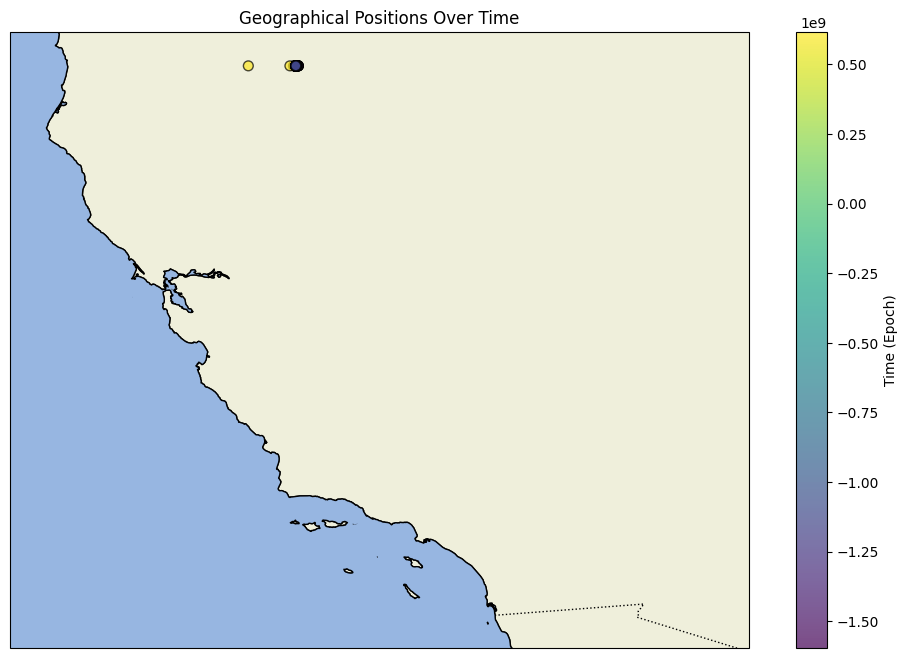

In [236]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate', zoom='california')

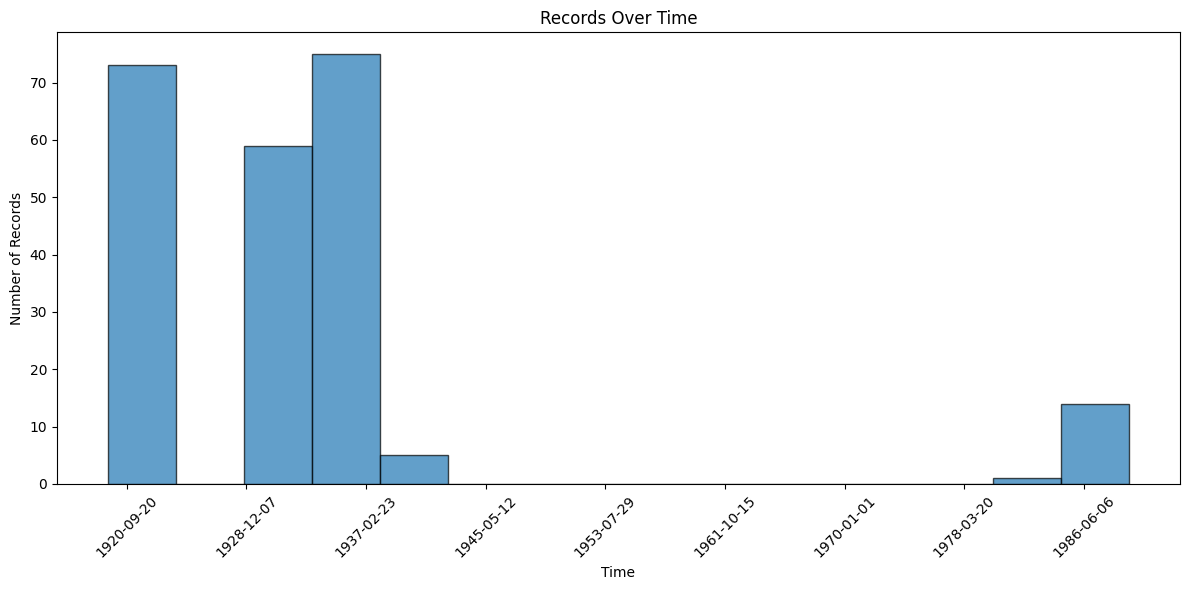

In [237]:
plot_time_histogram(test_df, datetime_col='startdate')

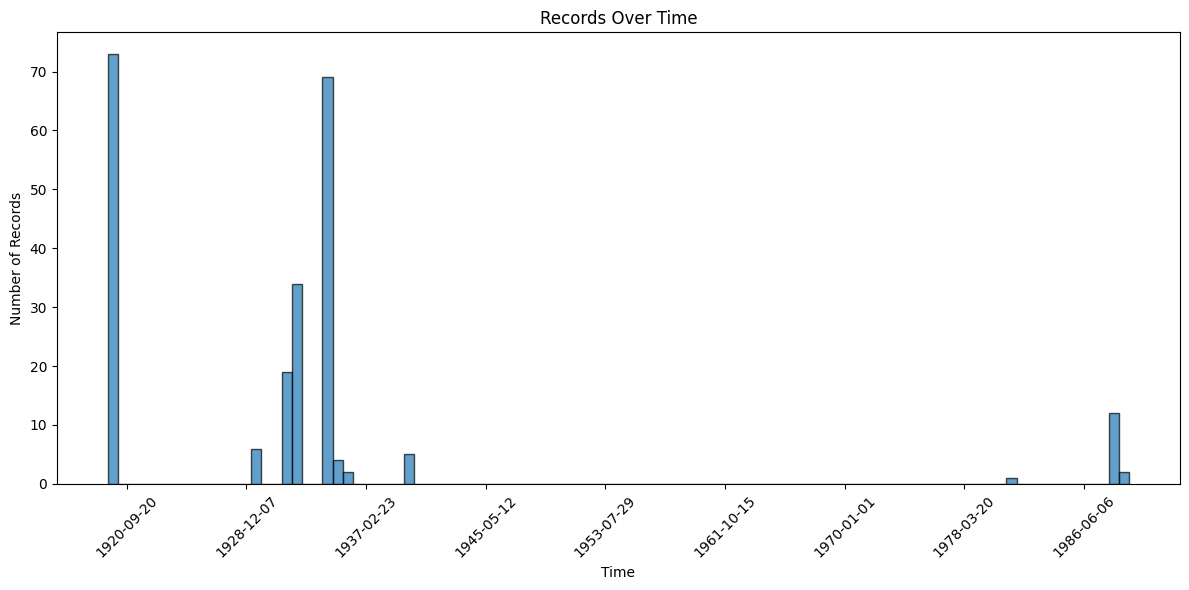

In [238]:
plot_time_histogram(test_df, datetime_col='startdate', bins=100)

In [239]:
test_df[test_df.localityid == 55313.0]

,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,enddate,remarks,...,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,startdate_num,enddate_num
91,164152,NaN,1.0,55313.0,208128.0,208231.0,69c51c3e-80ba-46bc-82b8-e1262a7f3509.jpg,1931-06-17,1931-06-17,NaN,...,5200.0,5200.0,0.0,41.4506,-120.3595,Parker Creek.,NaN,17158.0,-1.216339e+09,-1.216339e+09
92,164152,NaN,1.0,55313.0,208129.0,208232.0,22be2f5f-84ce-44de-b4bc-450378f4d8f8.jpg,1931-06-17,1931-06-17,NaN,...,5200.0,5200.0,0.0,41.4506,-120.3595,Parker Creek.,NaN,17158.0,-1.216339e+09,-1.216339e+09


In [240]:
test_df.localityid.value_counts()

localityid
55313.0     2
138443.0    1
59156.0     1
131059.0    1
29933.0     1
           ..
162528.0    1
117987.0    1
19796.0     1
77711.0     1
162061.0    1
Name: count, Length: 226, dtype: int64

In [174]:
df.latitude1

0        27.717865
1        24.882559
2       -14.435100
3        27.877222
4        41.932200
           ...    
44800    16.670000
44801    41.491695
44802    41.733299
44803    41.733299
44804    26.060278
Name: latitude1, Length: 44805, dtype: float64

In [153]:
df[df.collectionobjectid == 5]

,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,enddate,remarks,...,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,startdate_num,enddate_num
0,5,Tree ca. 4 m tall. Fruit purplish black.,8.0,66157.0,NaN,NaN,NaN,2004-10-29,NaT,Tsuga dumosa forest mixed with elements of sub...,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09


In [81]:
test_df = df[abs(df.latitude1 - 27.717865) < 0.00001].reset_index(drop=True)
test_df

,unnamed: 0,index,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,...,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,startdate_num,enddate_num
0,0,2,5,Tree ca. 4 m tall. Fruit purplish black.,8.0,66157.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
1,10638,52375,91014,Shrub ca. 3 mm tall. Young fruit green.,8.0,55602.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
2,11705,57552,100050,Tree ca. 7 m tall. Young fruit green.,8.0,86909.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
3,11718,57621,100178,Twining vine. Sepals greenish cream colored.,8.0,100437.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
4,22104,109001,190209,Tree ca. 10 m tall. In bud.,8.0,138740.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
5,26172,128903,225221,Shrub ca. 2.5 mm tall. Fruit green.,8.0,59796.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
6,32043,158119,276235,Shrub ca. 2.5 m tall. Fruit turning black.,8.0,115954.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
7,37487,184907,322679,Terrestrial fern with dimorphic fronds forming...,8.0,41984.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
8,39501,194746,339738,Twining vine. Fruit purple.,2.0,13668.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09


In [82]:
test_df.latitude1

0    27.717865
1    27.717865
2    27.717865
3    27.717865
4    27.717865
5    27.717865
6    27.717865
7    27.717865
8    27.717865
Name: latitude1, dtype: float64

Start date all same day, same elevation, same localityname, geographyid
### Verdict: same expedition

## ∆lat = 0.0001

In [99]:
test_df = df[abs(df.latitude1 - 27.717865) < 0.0001].reset_index(drop=True)
len(test_df)

19

In [100]:
test_df.head(4)

,unnamed: 0,index,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,...,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,startdate_num,enddate_num
0,0,2,5,Tree ca. 4 m tall. Fruit purplish black.,8.0,66157.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
1,8873,43798,76009,Epiphytic fern.,8.0,148643.0,NaN,NaN,NaN,2004-10-29,...,2500.0,2500.0,0.0,27.717778,98.421667,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,1.099008e+09
2,10638,52375,91014,Shrub ca. 3 mm tall. Young fruit green.,8.0,55602.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
3,11485,56358,97955,Arching shrub. Stems ca. 4 m long. Flowers cre...,8.0,24056.0,NaN,NaN,NaN,2004-10-29,...,2500.0,2500.0,0.0,27.717778,98.421667,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,1.099008e+09


In [101]:
test_df[['latitude1', 'longitude1', 'localityname', 'startdate', 'enddate']]

,latitude1,longitude1,localityname,startdate,enddate
0,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,NaT
1,27.717778,98.421667,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,2004-10-29
2,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,NaT
3,27.717778,98.421667,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,2004-10-29
4,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,NaT
5,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,NaT
6,27.717778,98.421667,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,2004-10-29
7,27.717778,98.421667,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,2004-10-29
8,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,NaT
9,27.717778,98.421667,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,2004-10-29


Start date all same day, same elevation, same localityname, geographyid
### Verdict: same expedition

## ∆lat = 0.001

In [108]:
test_df = df[abs(df.latitude1 - 27.717865) < 0.001].reset_index(drop=True)
len(test_df)

174

In [109]:
test_df[['latitude1', 'longitude1', 'localityname', 'startdate', 'enddate']]

,latitude1,longitude1,localityname,startdate,enddate
0,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,2004-10-29,NaT
1,27.717421,98.737190,"Yimaluo, E side of Salween river, along the tr...",2002-04-16,NaT
2,27.718170,98.569084,"E side of Gaoligong Shan, W of Gongshan, along...",2002-04-29,NaT
3,27.717392,98.692688,Vicinity of Shigu SW of Gongshan on the road t...,2002-09-26,NaT
4,27.716944,98.690556,Vicinity of Shigu SW of Gongshan along the roa...,2002-10-09,2002-10-09
...,...,...,...,...,...
169,27.717058,98.690521,Vicinity of Shigu SW of Gongshan along the roa...,2002-10-09,NaT
170,27.717421,98.737190,"Yimaluo, E side of Salween river, along the tr...",2002-04-16,NaT
171,27.717392,98.692688,Vicinity of Shigu SW of Gongshan on the road t...,2002-09-26,NaT
172,27.717058,98.690521,Vicinity of Shigu SW of Gongshan along the roa...,2002-10-09,NaT


In [110]:
test_df.head(4)

,unnamed: 0,index,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,...,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,startdate_num,enddate_num
0,0,2,5,Tree ca. 4 m tall. Fruit purplish black.,8.0,66157.0,NaN,NaN,NaN,2004-10-29,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,1.099008e+09,-9.223372e+09
1,59,252,447,Shrub ca. 2 m tall. Bud green.,1.0,94938.0,NaN,NaN,NaN,2002-04-16,...,2020.0,NaN,NaN,27.717421,98.737190,"Yimaluo, E side of Salween river, along the tr...",NaN,33269.0,1.018915e+09,-9.223372e+09
2,116,571,976,Shrub ca. 1.5 m tall. Fruits black.,1.0,100757.0,NaN,NaN,NaN,2002-04-29,...,2020.0,NaN,NaN,27.718170,98.569084,"E side of Gaoligong Shan, W of Gongshan, along...",NaN,33269.0,1.020038e+09,-9.223372e+09
3,303,1473,2556,Perennial herb. ca. 1.5 m tall. Flowers white.,4.0,65770.0,NaN,NaN,NaN,2002-09-26,...,1460.0,NaN,NaN,27.717392,98.692688,Vicinity of Shigu SW of Gongshan on the road t...,Vicinity of Shigu SW of Gongshan on the road t...,33269.0,1.032998e+09,-9.223372e+09


In [112]:
test_df['startdate'].unique()

<DatetimeArray>
['2004-10-29 00:00:00', '2002-04-16 00:00:00', '2002-04-29 00:00:00',
 '2002-09-26 00:00:00', '2002-10-09 00:00:00', '2000-07-10 00:00:00',
 '2000-07-12 00:00:00', '1990-12-30 00:00:00', '2000-07-17 00:00:00',
 '1991-03-22 00:00:00', '1990-11-22 00:00:00']
Length: 11, dtype: datetime64[ns]

In [113]:
test_df['localityname'].unique()

array(['Vicinity of Sandui campsite between Shigong Qiao and Xixiaofang on trail from Bapo to Gongshan via Qiqi on the W side',
       'Yimaluo, E side of Salween river, along the trail to wild ox valley.',
       'E side of Gaoligong Shan, W of Gongshan, along the Pula He on the trail from Gongshan to Qiqi and Dulong Jiang valley.',
       'Vicinity of Shigu SW of Gongshan on the road to Danzhu along the W bank of the Nu Jiang. E side of Gaoligong Shan. SW',
       'Vicinity of Shigu SW of Gongshan along the road to Danzhu, W side of the Nu Jiang. E side of Gaoligong Shan. SW facing',
       'E side of Gaoligong Shan, W of Gongshan, along the Pula He, between Qiqi bridge and Qiqi, on the trail from Gongshan to',
       'E side of Gaoligong Shan, W of Gongshan, in the vicinity of Qiqi above the Pula He.',
       'Along the Gamolai He, on the trail from Bapo to Gongshan on the E side of the Dulong Jiang.',
       'W side of Gaoligong Shan, W of Gongshan, on the trail from Qiqi to Bapo i

In [114]:
test_df['geographyid'].unique()

array([33272., 33269.])

Differing start dates, around 1990, 1991, 2000, 2002, 2004.

Differing localitynames, some appear similar enough to be clustered.

2 different geographyids.

## Verdict: A couple different clusters!

## Okay so for this example, looks like del latitude 0 0.001 was not granular enough.

In [14]:
df[['latitude1', 'longitude1']]

,latitude1,longitude1
0,27.717865,98.421631
1,24.882559,98.713638
2,-14.435100,49.767502
3,27.877222,98.335556
4,41.932200,-123.831000
...,...,...
44800,16.670000,-92.532500
44801,41.491695,-119.499161
44802,41.733299,-120.370796
44803,41.733299,-120.370796


In [ ]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print(geopy.distance.geodesic(coords_1, coords_2).km)

In [13]:
df[abs(df.latitude1 - 27.717865) < 0.00001]

,unnamed: 0,index,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,...,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid,startdate_num,enddate_num
0,0,2,5,Tree ca. 4 m tall. Fruit purplish black.,8.0,66157.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
10638,10638,52375,91014,Shrub ca. 3 mm tall. Young fruit green.,8.0,55602.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
11705,11705,57552,100050,Tree ca. 7 m tall. Young fruit green.,8.0,86909.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
11718,11718,57621,100178,Twining vine. Sepals greenish cream colored.,8.0,100437.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
22104,22104,109001,190209,Tree ca. 10 m tall. In bud.,8.0,138740.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
26172,26172,128903,225221,Shrub ca. 2.5 mm tall. Fruit green.,8.0,59796.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
32043,32043,158119,276235,Shrub ca. 2.5 m tall. Fruit turning black.,8.0,115954.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
37487,37487,184907,322679,Terrestrial fern with dimorphic fronds forming...,8.0,41984.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09
39501,39501,194746,339738,Twining vine. Fruit purple.,2.0,13668.0,NaN,NaN,NaN,NaT,...,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0,-9.223372e+09,-9.223372e+09


In [6]:
df.head(20)

,unnamed: 0,index,collectionobjectid,text1,countamt,collectingeventid,collectionobjectattachmentid,attachmentid,attachmentlocation,startdate,...,remarks,localityid,minelevation,maxelevation,elevationaccuracy,latitude1,longitude1,localityname,namedplace,geographyid
0,0,2,5,Tree ca. 4 m tall. Fruit purplish black.,8.0,66157.0,NaN,NaN,NaN,2004-10-29,...,Tsuga dumosa forest mixed with elements of sub...,66157.0,2500.0,NaN,NaN,27.717865,98.421631,Vicinity of Sandui campsite between Shigong Qi...,Vicinity of Sandui campsite between Shigong Qi...,33272.0
1,1,5,9,Perennial herb.,2.0,31111.0,NaN,NaN,NaN,2003-08-27,...,Remnant disturbed secondary forest on steep sl...,31111.0,1630.0,NaN,NaN,24.882559,98.713638,"Tenglan Cun, Lanniba He. W side of Gaoligong S...","Tenglan Cun, Lanniba He. W side of Gaoligong S...",33255.0
2,2,6,11,"arbre de 8m, fruits jaunes, rouge au sommet, p...",1.0,58265.0,NaN,NaN,NaN,2004-12-10,...,"foret dense humide de moyenne altitude, vegeta...",58265.0,623.0,NaN,NaN,-14.435100,49.767502,"Parc National de Marojejy, commune rurale de M...","Parc National de Marojejy, commune rurale de M...",27772.0
3,3,10,20,Tree ca. 8 m tall. Young fruits green.,1.0,105773.0,153980.0,153981.0,2606ab29-8b8c-46df-b3bb-03587d23a2aa.jpg,2002-07-24,...,Evergreen broad-leaved forest.,105773.0,2300.0,2300.0,0.0,27.877222,98.335556,"Kongdang, W side of Gaoligong Shan, along the ...","Kongdang, W side of Gaoligong Shan, along the ...",33272.0
4,4,14,24,NaN,1.0,19002.0,365549.0,365652.0,8cd186c3-3176-48ac-858e-fe82ddb98af9.jpg,1935-06-08,...,NaN,19002.0,NaN,NaN,NaN,41.932200,-123.831000,Old road from Patrick's Creek into Oregon.,NaN,9217.0
5,5,15,25,Shrub ca. 2 m tall. Fruit red.,8.0,88358.0,NaN,NaN,NaN,2002-09-28,...,With scattered Abies and Larix.,88358.0,2980.0,2980.0,0.0,27.798056,98.503333,Vicinity of Dabadi along the Sikeluo river on ...,Vicinity of Dabadi along the Sikeluo river on ...,33269.0
6,6,18,28,Annual.,1.0,103138.0,603448.0,603552.0,bb747f67-fa35-402c-960f-b46797bd6a6b.jpg,1990-07-20,...,Moist meadow in Lodgepole Pine forest.,103138.0,2150.0,2150.0,0.0,41.886600,-120.218100,"Tamarack Flat, E side of Warner Mts.",NaN,17158.0
7,7,23,39,"Ray flowers white, disk flowers yellow.",1.0,103989.0,465741.0,465845.0,a3e43330-d49d-4974-a2ba-501998c26d27.jpg,1950-05-14,...,NaN,103989.0,500.0,500.0,0.0,37.083333,-122.066667,"Ben Lomond San Hills, near summit of Quail Hol...",NaN,23212.0
8,8,24,40,Growing on dry slopes; flowers dark purple-blu...,2.0,134787.0,NaN,NaN,NaN,1997-06-01,...,NaN,134787.0,6000.0,6000.0,0.0,41.491667,-119.499167,"Upper High Rock Canyon, 0.25 mi south of Steve...",NaN,26961.0
9,9,38,70,Perennial herb.,1.0,144235.0,429736.0,429840.0,9c4c5b86-3616-43bd-b584-f75f941b5be6.jpg,1991-10-13,...,Dry lake bottom of Middle Alkali Lake.,144235.0,1320.0,1320.0,0.0,41.536400,-120.078900,"Just N of Surprise Valley Mineral Hot Springs,...",NaN,17158.0


In [5]:
df['localityname']

0        Vicinity of Sandui campsite between Shigong Qi...
1        Tenglan Cun, Lanniba He. W side of Gaoligong S...
2        Parc National de Marojejy, commune rurale de M...
3        Kongdang, W side of Gaoligong Shan, along the ...
4               Old road from Patrick's Creek into Oregon.
                               ...                        
44800                                             Mitziton
44801    Upper High Rock Canyon, 0.25 mi south of Steve...
44802                                    Near Davis Creek.
44803                                    Near Davis Creek.
44804    Ca. 12.9 km N of Pianma on the road to Gangfan...
Name: localityname, Length: 44805, dtype: object